In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [2]:
# Generate Linear Data
def generate_linearly(n_points=15):
    # class 1
    class1 = np.random.randn(n_points, 2) + np.array([2,2])

    # class -1
    class2 = np.random.randn(n_points, 2) + np.array([-2,-2])
    X = np.vstack((class1,class2))
    y = np.hstack((np.ones(n_points), -np.ones(n_points)))

    return X, y

# Generate Non-Linear Data
def generate_non_linearly(n_points=15):
    # class 1
    class1 = np.random.randn(n_points, 2) + np.array([1,1])

    # class 2
    class2 = np.random.randn(n_points, 2) + np.array([1,-1])

    X = np.vstack((class1, class2))
    y = np.hstack((np.ones(n_points), -np.ones(n_points)))
    return X, y


In [10]:
def perceptron(X, y, eta=1.0, epochs=200, initial_weights=None):
    X = np.c_[np.ones(X.shape[0]), X] # grants bias
    if initial_weights is None:
        weights = np.zeros(X.shape[1]) #Initial weights of 0
    else:
        weights = initial_weights

    updates = 0

    # for the number of epochs (iterations) go through the list
    for _ in range(epochs):
        error = False
        for i in range(X.shape[0]):
            if np.sign(np.dot(weights, X[i])) != y[i]:
                weights += eta * y[i] * X[i]
                updates += 1
                error = True
        if not error:
            break

    # Calculate training error
    predictions = np.sign(np.dot(X, weights))
    training_error = np.mean(predictions != y) * 100

    return weights, updates, training_error

In [4]:
# plot the boundary line
def plot_bound(weights, X, y, title):
    plt.figure(figsize=(8,6))
    plt.scatter(X[:,0], X[:,1], c=y, cmap='bwr', edgecolors='k')
    xmin, xmax = plt.xlim()
    ymin, ymax = plt.ylim()

    x_vals = np.linspace(xmin, xmax, 100)
    y_vals = -(weights[0] + weights[1] * x_vals) / weights[2]
    plt.plot(x_vals, y_vals, 'k--')

    plt.title(title)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.grid(True)
    plt.show()


In [5]:
# generate linear data for training
train_X_lin, train_y_lin = generate_linearly()
df_lin = pd.DataFrame(train_X_lin)
df_lin.to_csv("linearly.csv")

# generate non-linear training data
train_X_non, train_y_non = generate_non_linearly()
df_non = pd.DataFrame(train_X_non)
df_non.to_csv("non_linearly.csv")

In [6]:
# generate test data
test_X, test_y = generate_linearly(5) # Test data should remain lineraly sperable to show loss of accuracy from less sorted training data

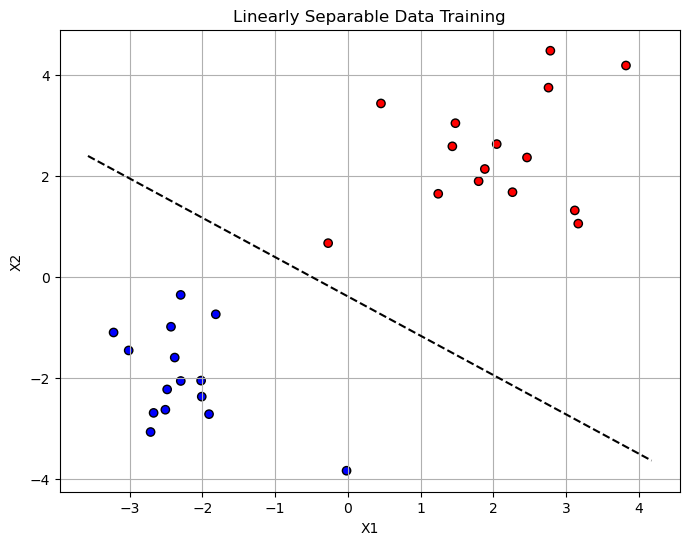

Linearly Separable Training Data:
  Number of weight updates: 1
  Training error rate: 0.00%
Final Weights:  [1.         2.04791623 2.633608  ]


In [46]:
# Testing Linear
weights_linear, updates_linear, training_err_lin = perceptron(train_X_lin, train_y_lin)
plot_bound(weights_linear, train_X_lin, train_y_lin, "Linearly Separable Data Training")

# Display training results for linearly separable data
print(f"Linearly Separable Training Data:")
print(f"  Number of weight updates: {updates_linear}")
print(f"  Training error rate: {training_err_lin:.2f}%")
print(f"Final Weights:  {weights_linear}")

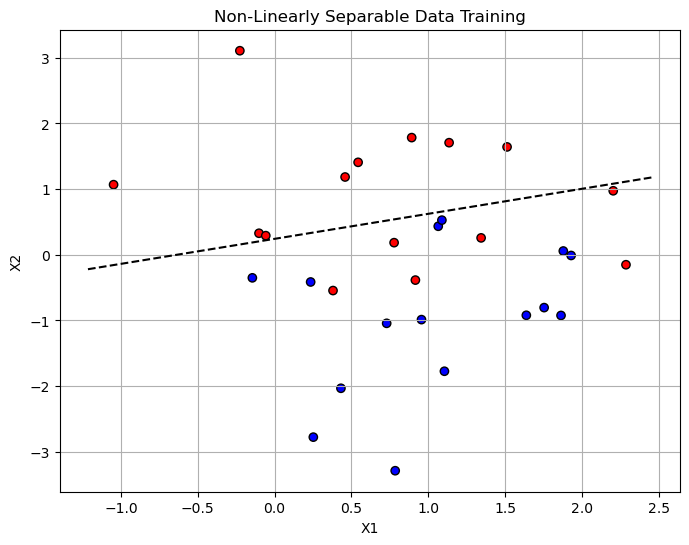

Non-Linearly Separable Training Data:
  Number of weight updates: 1207
  Training error rate: 20.00%
Final Weights:  [-1.         -1.57020717  4.12184453]


In [45]:
# Testing Non-Linear
weights_non, updates_non, training_err_non = perceptron(train_X_non, train_y_non)
plot_bound(weights_non, train_X_non, train_y_non, "Non-Linearly Separable Data Training")

print(f"Non-Linearly Separable Training Data:")
print(f"  Number of weight updates: {updates_non}")
print(f"  Training error rate: {training_err_non:.2f}%")
print(f"Final Weights:  {weights_non}")

In [16]:
test_X_aug = np.c_[np.ones(test_X.shape[0]), test_X]
predictions = np.sign(np.dot(test_X_aug, weights_linear))

# Calc Accuracy and Classification Support
accuracy = accuracy_score(test_y, predictions)
print(accuracy)

report = classification_report(predictions, test_y, digits=2)
print(report)

1.0
              precision    recall  f1-score   support

        -1.0       1.00      1.00      1.00         5
         1.0       1.00      1.00      1.00         5

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



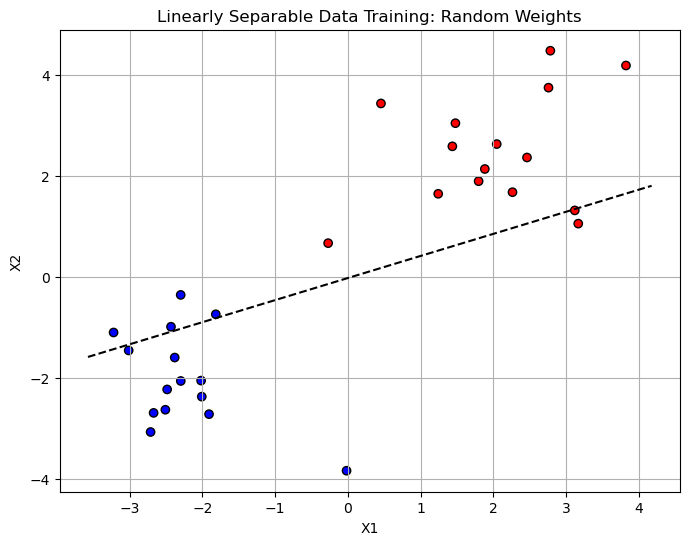

Linearly Separable Training Data:
  Number of weight updates: 4802
  Training error rate: 80.00%
Final Weights:  [  -75.51995937  1981.40354833 -4535.88559578]


In [44]:
initial_weights = np.random.randn(train_X_lin.shape[1] + 1)
weights_linear, updates_linear, training_err_lin = perceptron(train_X_lin, train_y_lin, initial_weights)
plot_bound(weights_linear, train_X_lin, train_y_lin, "Linearly Separable Data Training: Random Weights")

# Display training results for linearly separable data
print(f"Linearly Separable Training Data:")
print(f"  Number of weight updates: {updates_linear}")
print(f"  Training error rate: {training_err_lin:.2f}%")
print(f"Final Weights:  {weights_linear}")

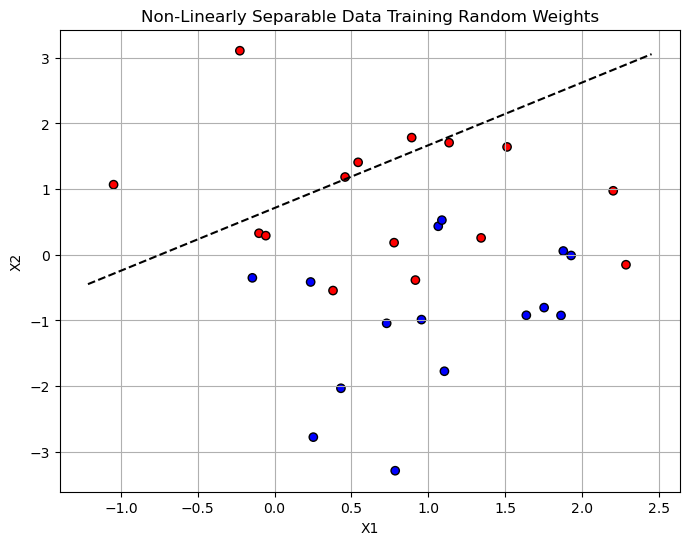

Non-Linearly Separable Training Data:
  Number of weight updates: 1999
  Training error rate: 33.33%
Final Weights:  [-602.33072448 -807.00795807  845.17059192]


In [43]:
weights_non, updates_non, training_err_non = perceptron(train_X_non, train_y_non, initial_weights)
plot_bound(weights_non, train_X_non, train_y_non, "Non-Linearly Separable Data Training Random Weights")

print(f"Non-Linearly Separable Training Data:")
print(f"  Number of weight updates: {updates_non}")
print(f"  Training error rate: {training_err_non:.2f}%")
print(f"Final Weights:  {weights_non}")

In [22]:
print(initial_weights)

[-0.30131602 -0.38813293  0.98297448]


# Now it's time for changing the Step Size Constant

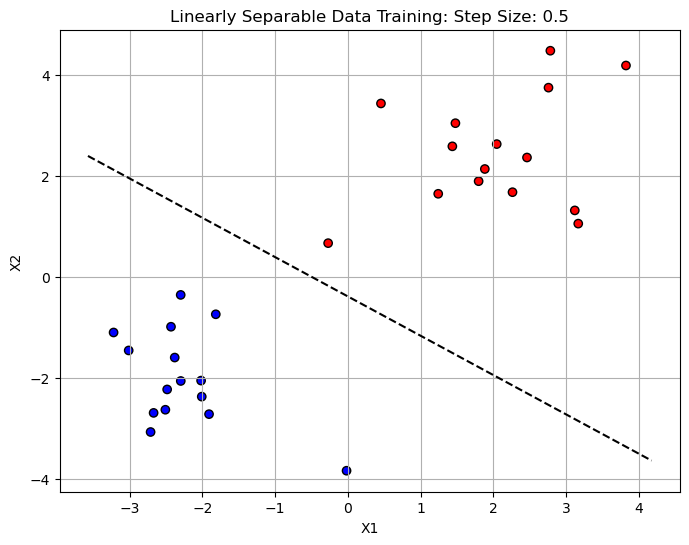

Linearly Separable Training Data:
  Number of weight updates: 1
  Training error rate: 0.00%
Final Weights:  [0.2        0.40958325 0.5267216 ]


In [42]:
weights_linear, updates_linear, training_err_lin = perceptron(train_X_lin, train_y_lin, 0.2)
plot_bound(weights_linear, train_X_lin, train_y_lin, "Linearly Separable Data Training: Step Size: 0.5")

# Display training results for linearly separable data
print(f"Linearly Separable Training Data:")
print(f"  Number of weight updates: {updates_linear}")
print(f"  Training error rate: {training_err_lin:.2f}%")
print(f"Final Weights:  {weights_linear}")

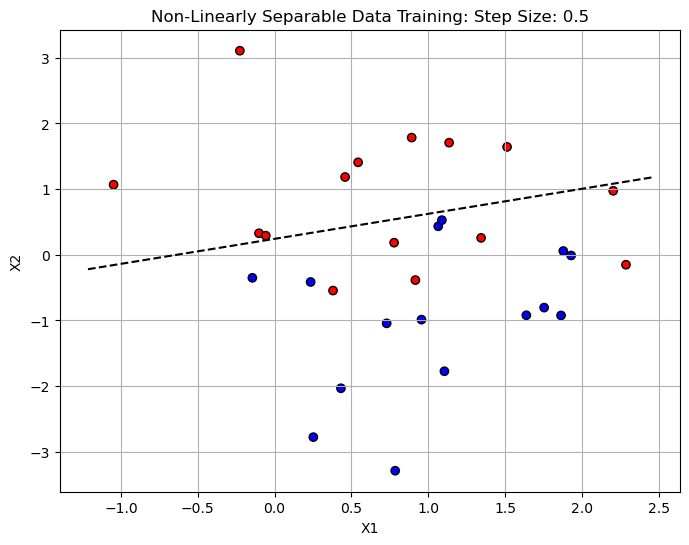

Non-Linearly Separable Training Data:
  Number of weight updates: 1207
  Training error rate: 20.00%
Final Weights:  [-0.5        -0.78510359  2.06092227]


In [41]:
weights_non, updates_non, training_err_non = perceptron(train_X_non, train_y_non, eta=0.5)
plot_bound(weights_non, train_X_non, train_y_non, "Non-Linearly Separable Data Training: Step Size: 0.5")

print(f"Non-Linearly Separable Training Data:")
print(f"  Number of weight updates: {updates_non}")
print(f"  Training error rate: {training_err_non:.2f}%")
print(f"Final Weights:  {weights_non}")

# Shuffle Data Entry

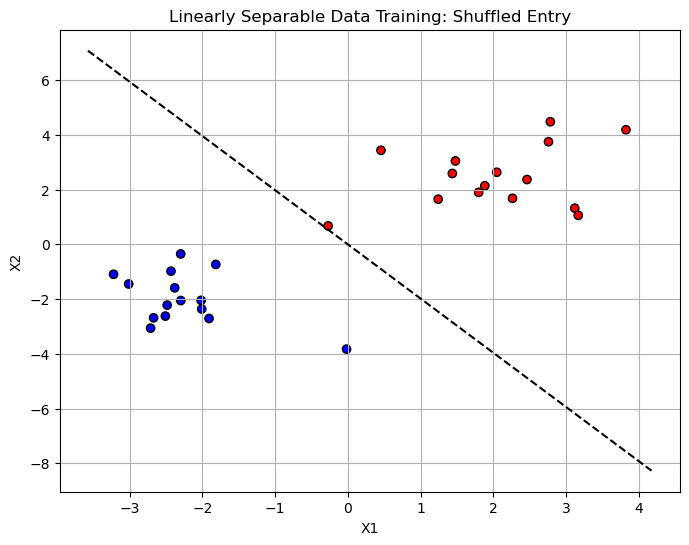

Linearly Separable Training Data:
  Number of weight updates: 2
  Training error rate: 0.00%
Final Weights:  [0.         2.02763205 1.02404778]


In [40]:
def shuffle_data(X, y):
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)
    return X[indices], y[indices]


# Shuffling the sets
shuffle_X_lin, shuffle_y_lin = shuffle_data(train_X_lin, train_y_lin)
weights_linear, updates_linear, training_err_lin = perceptron(shuffle_X_lin, shuffle_y_lin)
plot_bound(weights_linear, shuffle_X_lin, shuffle_y_lin, "Linearly Separable Data Training: Shuffled Entry")

print(f"Linearly Separable Training Data:")
print(f"  Number of weight updates: {updates_linear}")
print(f"  Training error rate: {training_err_lin:.2f}%")
print(f"Final Weights:  {weights_linear}")

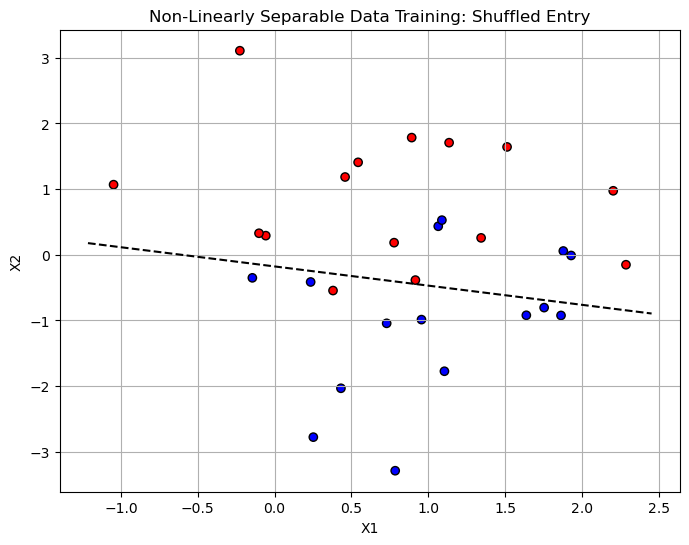

Non-Linearly Separable Training Data:
  Number of weight updates: 1755
  Training error rate: 16.67%
Final Weights:  [1.         1.64406167 5.62534438]


In [47]:
# Shuffling the sets
shuffle_X_non, shuffle_y_non = shuffle_data(train_X_non, train_y_non)
weights_non, updates_non, training_err_non = perceptron(shuffle_X_non, shuffle_y_non)
plot_bound(weights_non, shuffle_X_non, shuffle_y_non, "Non-Linearly Separable Data Training: Shuffled Entry")

print(f"Non-Linearly Separable Training Data:")
print(f"  Number of weight updates: {updates_non}")
print(f"  Training error rate: {training_err_non:.2f}%")
print(f"Final Weights:  {weights_non}")